In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv("../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,GDP Growth Rate,Interest Rate,Inflation Rate
0,2008-01-01,715.715759,717.944580,702.119629,705.376221,630.190979,4864461.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
1,2008-01-02,707.047913,714.229797,696.225464,708.719543,633.178162,12588005.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2,2008-01-03,706.304932,725.621826,700.918518,719.108582,642.459778,13939233.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
3,2008-01-04,719.182861,747.861023,719.182861,741.223938,662.217773,16366255.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
4,2008-01-07,736.716675,750.387085,733.051392,747.972473,668.247131,12650730.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,2018-12-24,1090.562500,1092.840942,1076.347290,1078.922852,1058.601440,4183821.0,Reliance Industries Ltd,2018,6.5,5.4,3.9
2704,2018-12-26,1075.604370,1089.671021,1055.643555,1088.036499,1067.543579,7278403.0,Reliance Industries Ltd,2018,6.5,5.4,3.9
2705,2018-12-27,1096.803345,1116.417480,1093.633423,1109.681274,1088.780640,12596278.0,Reliance Industries Ltd,2018,6.5,5.4,3.9
2706,2018-12-28,1114.931519,1124.589966,1110.671997,1114.981079,1093.980713,7738682.0,Reliance Industries Ltd,2018,6.5,5.4,3.9


In [4]:
df[df["Date"].duplicated(keep = False)]
df = df[~df["Date"].duplicated()]

df.index = pd.to_datetime(df["Date"])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,GDP Growth Rate,Interest Rate,Inflation Rate
Date,,,,,,,,,,,,
2008-01-01,2008-01-01,715.715759,717.944580,702.119629,705.376221,630.190979,4864461.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-02,2008-01-02,707.047913,714.229797,696.225464,708.719543,633.178162,12588005.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-03,2008-01-03,706.304932,725.621826,700.918518,719.108582,642.459778,13939233.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-04,2008-01-04,719.182861,747.861023,719.182861,741.223938,662.217773,16366255.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-07,2008-01-07,736.716675,750.387085,733.051392,747.972473,668.247131,12650730.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,2018-12-24,1090.562500,1092.840942,1076.347290,1078.922852,1058.601440,4183821.0,Reliance Industries Ltd,2018,6.5,5.4,3.9
2018-12-26,2018-12-26,1075.604370,1089.671021,1055.643555,1088.036499,1067.543579,7278403.0,Reliance Industries Ltd,2018,6.5,5.4,3.9
2018-12-27,2018-12-27,1096.803345,1116.417480,1093.633423,1109.681274,1088.780640,12596278.0,Reliance Industries Ltd,2018,6.5,5.4,3.9


<AxesSubplot:xlabel='Date'>

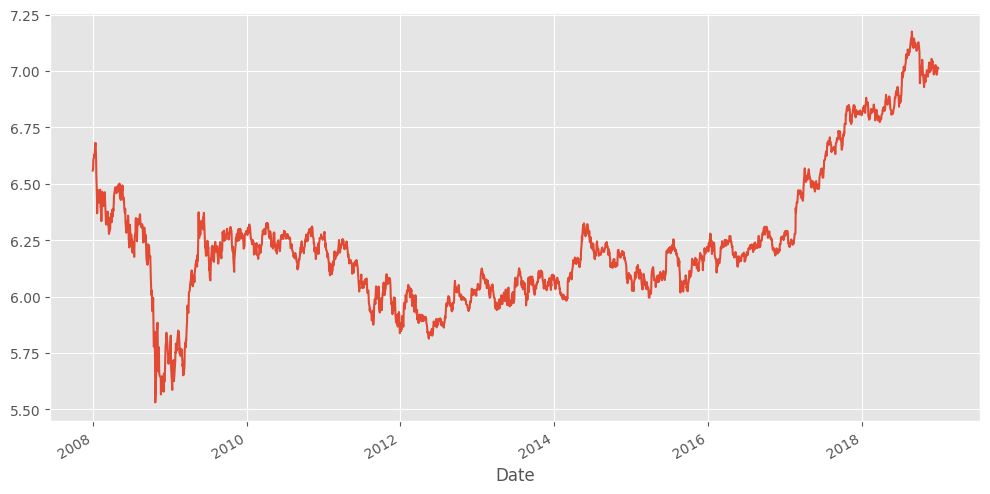

In [7]:
df.index
y = np.log(df["Close"])
y.plot()

In [8]:
y.index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10',
               '2008-01-11', '2008-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)

In [9]:
list(y.index[:10])

[Timestamp('2008-01-01 00:00:00'),
 Timestamp('2008-01-02 00:00:00'),
 Timestamp('2008-01-03 00:00:00'),
 Timestamp('2008-01-04 00:00:00'),
 Timestamp('2008-01-07 00:00:00'),
 Timestamp('2008-01-08 00:00:00'),
 Timestamp('2008-01-09 00:00:00'),
 Timestamp('2008-01-10 00:00:00'),
 Timestamp('2008-01-11 00:00:00'),
 Timestamp('2008-01-14 00:00:00')]

In [10]:
y.asfreq("D")[:15]

Date
2008-01-01    6.558731
2008-01-02    6.563460
2008-01-03    6.578012
2008-01-04    6.608303
2008-01-05         NaN
2008-01-06         NaN
2008-01-07    6.617366
2008-01-08    6.628692
2008-01-09    6.621793
2008-01-10    6.619863
2008-01-11    6.652293
2008-01-12         NaN
2008-01-13         NaN
2008-01-14    6.681672
2008-01-15    6.664353
Freq: D, Name: Close, dtype: float64

In [11]:
y.asfreq("D", method="ffill")[:15]

Date
2008-01-01    6.558731
2008-01-02    6.563460
2008-01-03    6.578012
2008-01-04    6.608303
2008-01-05    6.608303
2008-01-06    6.608303
2008-01-07    6.617366
2008-01-08    6.628692
2008-01-09    6.621793
2008-01-10    6.619863
2008-01-11    6.652293
2008-01-12    6.652293
2008-01-13    6.652293
2008-01-14    6.681672
2008-01-15    6.664353
Freq: D, Name: Close, dtype: float64

In [12]:
y = y.asfreq("B")
y.index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10',
               '2008-01-11', '2008-01-14',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2870, freq='B')

In [13]:
pd.DataFrame(dict(low=y.resample("Q").min(), 
                  high=y.resample("Q").max(), 
                  first = y.resample("Q").first(), 
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2008-03-31,6.277959,6.681672,6.558731,6.329954,6.430916,6.442487
2008-06-30,6.217942,6.501177,6.364419,6.251652,6.415698,6.400260
2008-09-30,6.141515,6.365271,6.227009,6.179523,6.270352,6.261385
2008-12-31,5.531339,6.157401,6.157401,5.721274,5.732206,5.755957
2009-03-31,5.586716,5.960232,5.763874,5.933857,5.763038,5.762293
2009-06-30,5.970242,6.373882,5.970242,6.216806,6.195634,6.196542
2009-09-30,6.072185,6.301234,6.234150,6.301234,6.209277,6.205569
2009-12-31,6.110066,6.308971,6.288756,6.291856,6.266974,6.256287
2010-03-31,6.167576,6.320019,6.277959,6.276797,6.241650,6.245558


In [14]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2008-01-01,6.558731,NaN,6.558731
2008-01-02,6.563460,NaN,6.561884
2008-01-03,6.578012,6.566735,6.571100
2008-01-04,6.608303,6.583258,6.590942
2008-01-07,6.617366,6.601227,6.604580
2008-01-08,6.628692,6.618120,6.616827
2008-01-09,6.621793,6.622617,6.619330
2008-01-10,6.619863,6.623449,6.619597
2008-01-11,6.652293,6.631316,6.635977


In [15]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.015445118456226642
rmse over ewma:  0.01164126681443274


<AxesSubplot:xlabel='Date'>

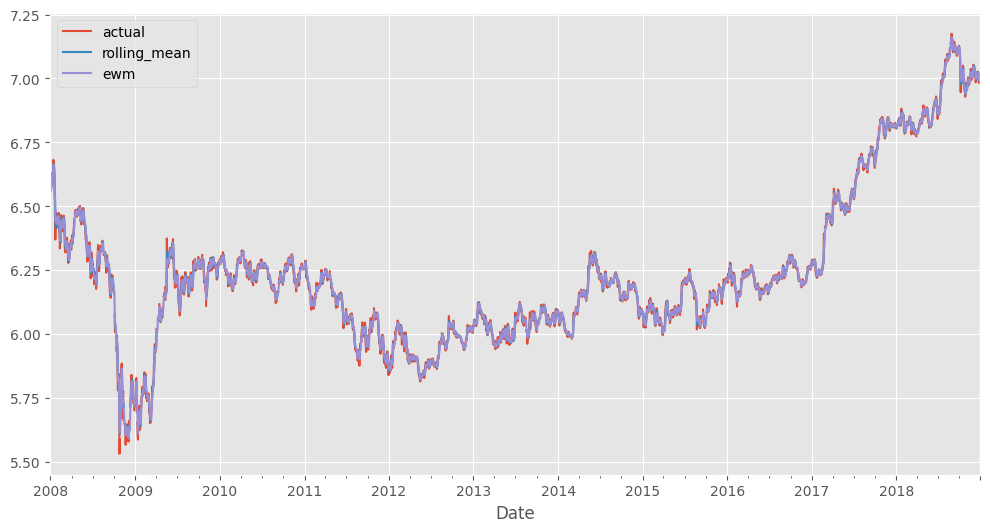

In [16]:
y_rolling.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.866230
p-value: 0.798890


In [18]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2008-01-01,6.558731,NaN,NaN
2008-01-02,6.563460,NaN,NaN
2008-01-03,6.578012,NaN,NaN
2008-01-04,6.608303,0.049571,NaN
2008-01-07,6.617366,0.053906,0.004335
2008-01-08,6.628692,0.050679,-0.003227
2008-01-09,6.621793,0.013490,-0.037189
2008-01-10,6.619863,0.002497,-0.010994
2008-01-11,6.652293,0.023601,0.021104


In [19]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -32.688123
p-value: 0.000000


<AxesSubplot:xlabel='Date'>

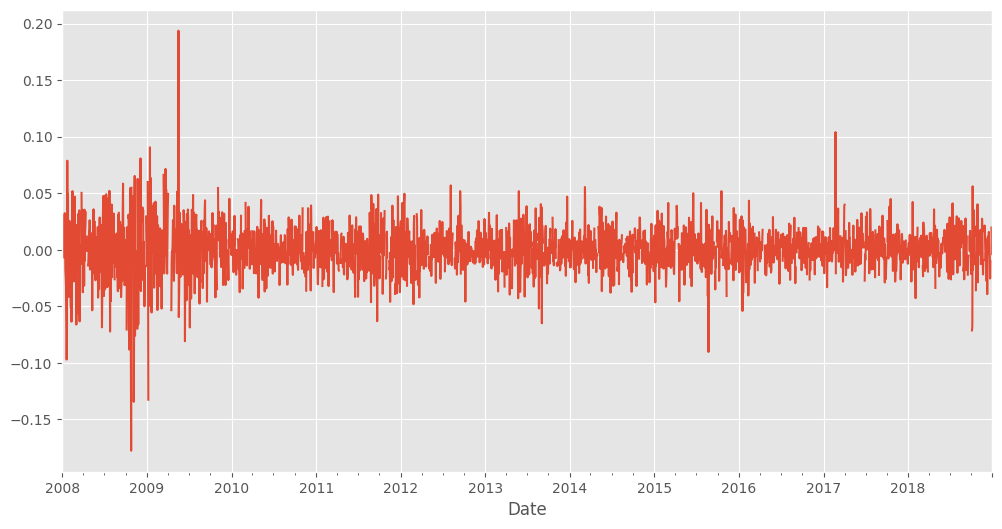

In [20]:
y.diff(periods=1).plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

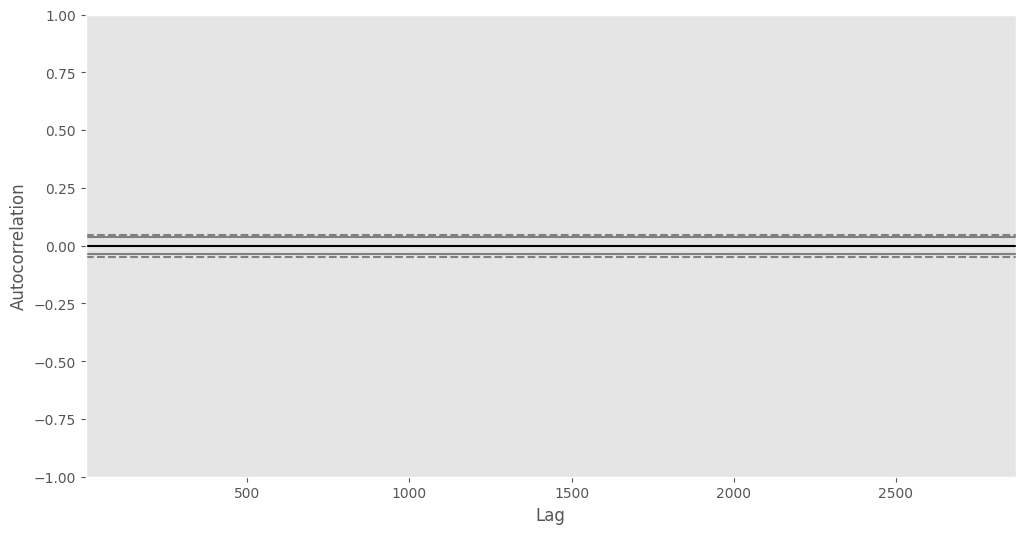

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2870
Model:                 ARIMA(2, 1, 2)   Log Likelihood                6641.456
Date:                Mon, 04 Dec 2023   AIC                         -13272.911
Time:                        02:53:46   BIC                         -13243.103
Sample:                    01-01-2008   HQIC                        -13262.165
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7775      0.156      4.973      0.000       0.471       1.084
ar.L2         -0.2081      0.151     -1.378      0.168      -0.504       0.088
ma.L1         -0.7270      0.161     -4.522      0.0

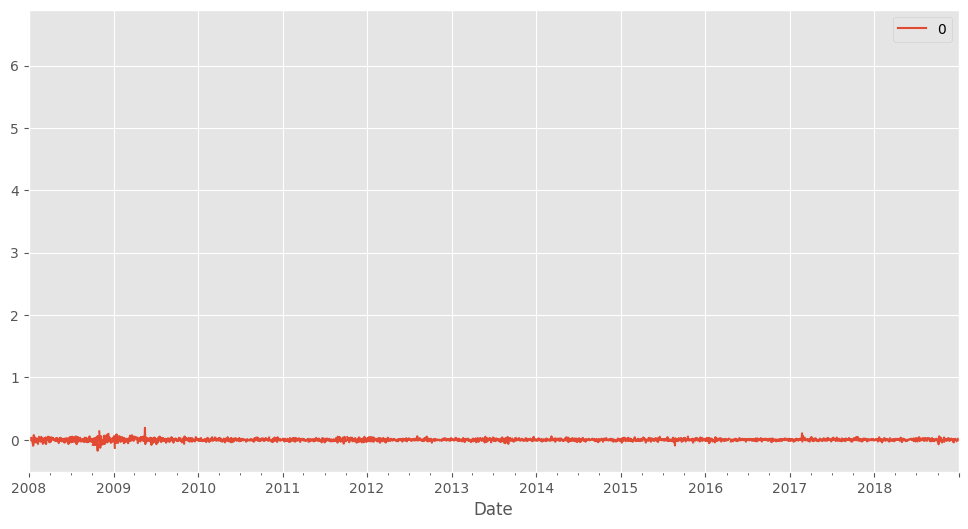

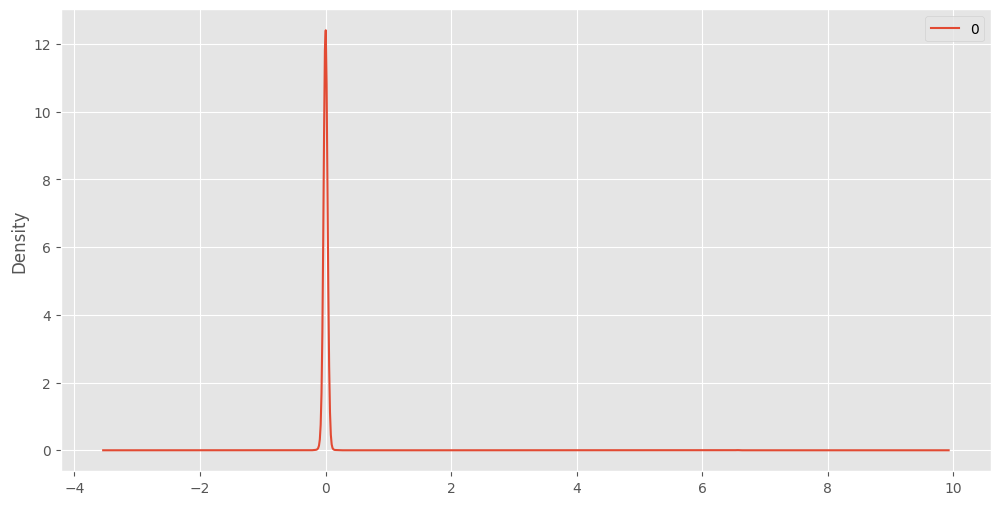

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(y, order=(2,1,2)) # p, d, q
model_fit = model.fit()
print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [51]:
predictions= model_fit.forecast(150)
plt.plot(predictions)
# plt.fill_between(range(len(predictions)), conf_interval[:,0], conf_interval[:,1], alpha = 0.3)
error=[]
for i in (0,150):
    error.append(y-predictions[i])




pandas.core.series.Series

In [52]:
predictions[:10]

array([7.01163037, 7.01111981, 7.01095898, 7.0109402 , 7.01095906,
       7.01097764, 7.01098816, 7.01099247, 7.01099363, 7.01099364])

In [63]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test)
plt.plot(predictions, color='red')

IndexError: invalid index to scalar variable.